## Regression Model for Predicting Nitrogen (N) Requirement


My Mission is to empower farmers in Africa by intergrating technology and AI through developing an application that will help farmers quickily identify plant diseases, enabling them to take timely action to reduce yield losses and significantly boost their harvests. For this project, I have developed an agricultural application that leverages a Random Forest regression model to optimize crop nutrition. The system analyzes key environmental and soil parameters—including temperature, humidity, pH levels, rainfall, potassium, and phosphorus—to provide precise nitrogen recommendations for specific crops.

This solution directly supports my broader mission of empowering farmers by:
- Reducing guesswork in fertilizer application
- Optimizing resource utilization and costs
- Maximizing crop yields through data-driven decisions
- Making advanced agricultural insights accessible to smallholder farmers

**Predicting the amount of Nitrogen needed to be applied by farmers provided Potassius, Phosphorus, Temperature, pH, rainfall, and the crop they want to grow.**

In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns



In [72]:

# Load the dataset
data= pd.read_csv("Crop_recommendation.csv")
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


## Check the mean, median, and std of each column

In [74]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


## Visualize numeric distribution using histplot

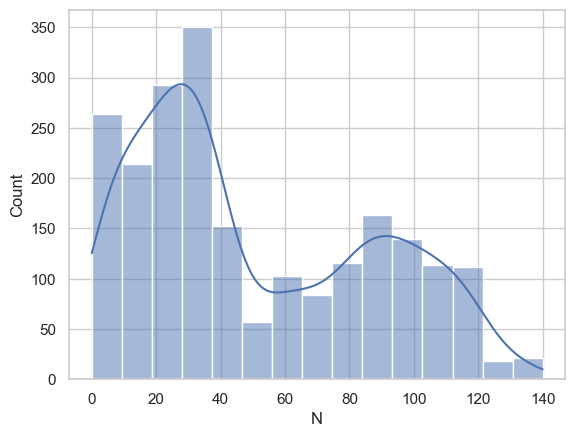

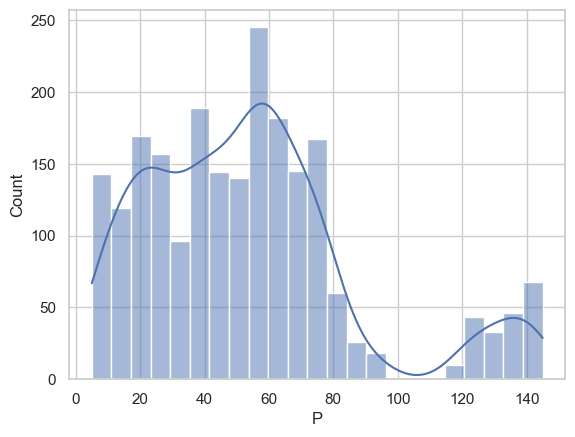

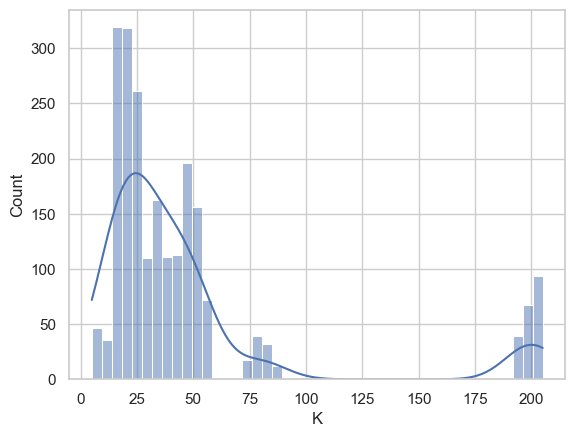

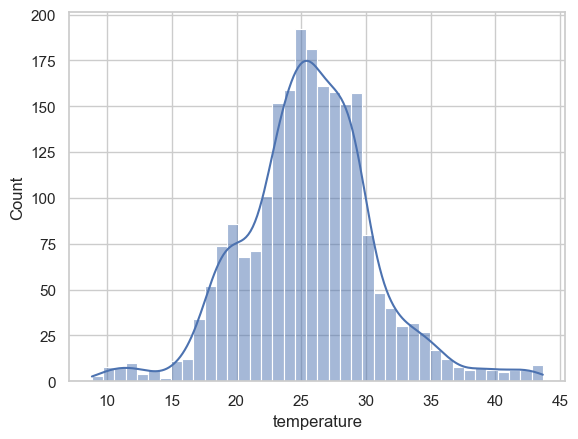

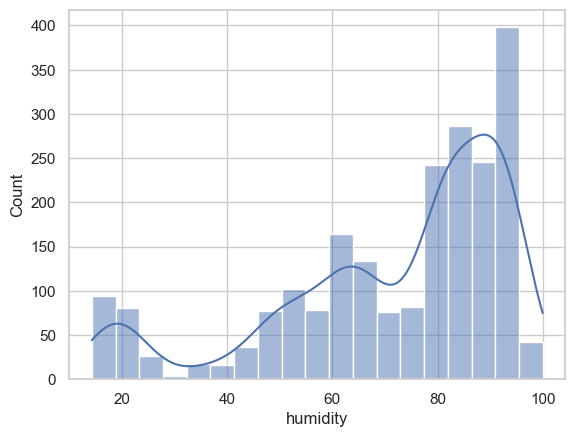

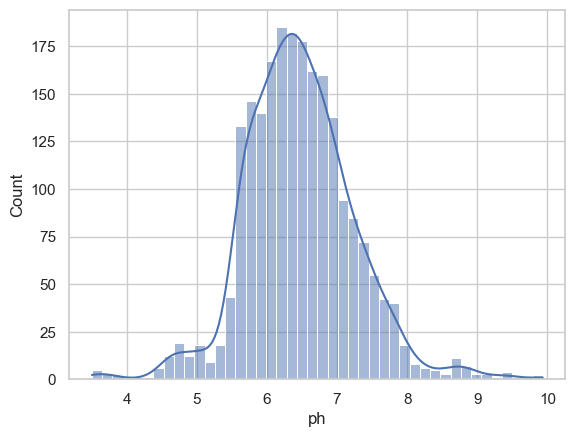

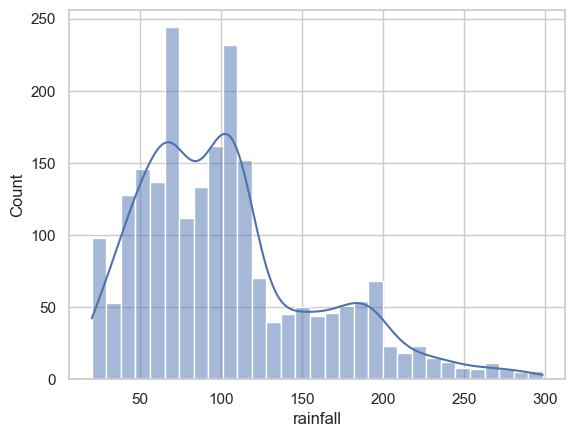

In [75]:
for num, i in enumerate(data.drop(columns='label', axis=1).columns):
    sns.histplot(data[i], kde=True)
    plt.show()

In [76]:
# Encode 'label' column (crop type) to Numerical number
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])

data.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
5,69,37,42,23.058049,83.370118,7.073454,251.055000,20
6,69,55,38,22.708838,82.639414,5.700806,271.324860,20
7,94,53,40,20.277744,82.894086,5.718627,241.974195,20
8,89,54,38,24.515881,83.535216,6.685346,230.446236,20
9,68,58,38,23.223974,83.033227,6.336254,221.209196,20


In [77]:
print(data['label'].describe())

count    2200.000000
mean       10.500000
std         6.345731
min         0.000000
25%         5.000000
50%        10.500000
75%        16.000000
max        21.000000
Name: label, dtype: float64


In [78]:
X = data.drop('N', axis=1)  # Features: P, K, temperature, humidity, ph, rainfall, Label
y = data['N']  # Target: Nitrogen (N)

In [79]:
print(y.describe())

count    2200.000000
mean       50.551818
std        36.917334
min         0.000000
25%        21.000000
50%        37.000000
75%        84.250000
max       140.000000
Name: N, dtype: float64


In [80]:
# Split Data into Training and Testing Sets(80% train, 20% test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
#  Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Linear Regression Model 1

In [82]:
# Train the Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [83]:
# Predict Nitrogen (N) content on the test set
y_pred = lr_model.predict(X_test_scaled)

In [84]:
#  Evaluate the model
test_rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train, lr_model.predict(X_train_scaled)))
r2 = r2_score(y_test, y_pred)

In [85]:
print("Linear Regression Results:")
print(f"- Test RMSE: {test_rmse_lr:.2f} (Lower is better)")
print(f"- Train RMSE: {train_rmse:.2f} (Lower is better)")
print(f"- R² Score: {r2:.2f} (1.0 is perfect)")


Linear Regression Results:
- Test RMSE: 33.82 (Lower is better)
- Train RMSE: 34.74 (Lower is better)
- R² Score: 0.08 (1.0 is perfect)


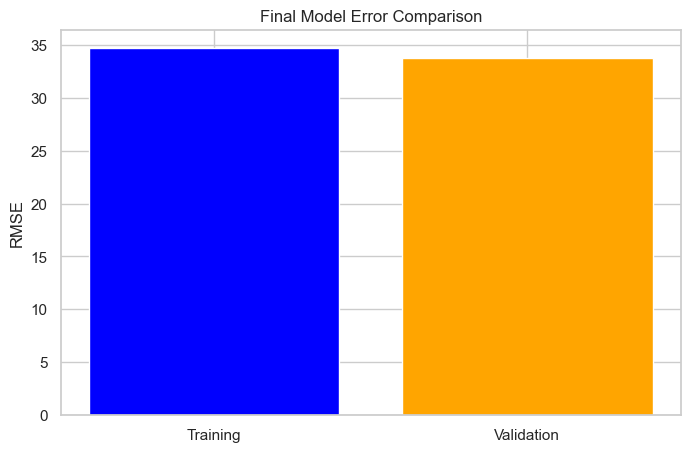

In [86]:
# Calculate final losses

plt.figure(figsize=(8, 5))
plt.bar(['Training', 'Validation'], [train_rmse, test_rmse_lr], color=['blue', 'orange'])
plt.ylabel('RMSE')
plt.title('Final Model Error Comparison')
plt.show()

## Feature Importances

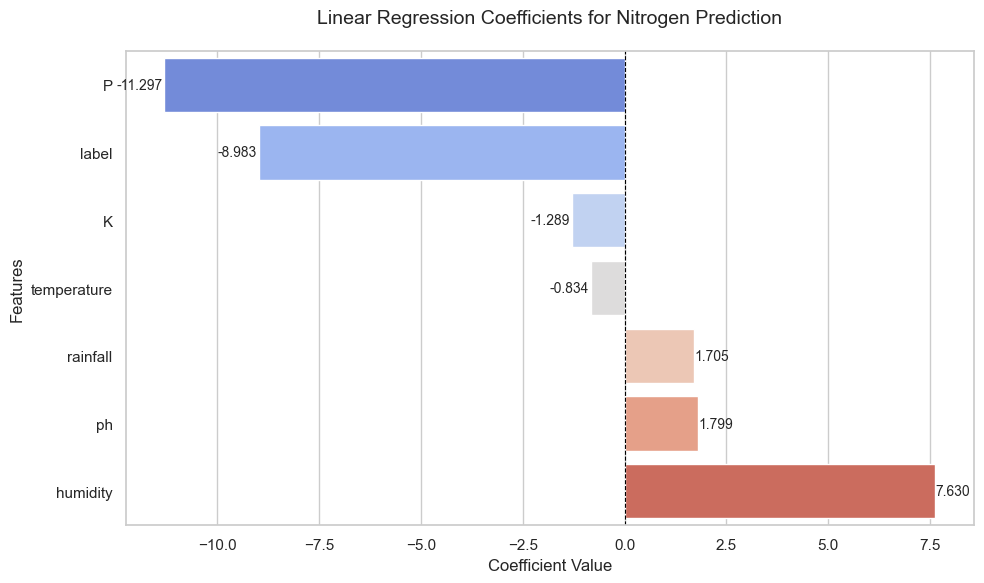

In [87]:
# Create DataFrame with coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', ascending=True)

sns.set_theme(style="whitegrid") 
plt.figure(figsize=(10, 6))

# Create plot
ax = sns.barplot(
    x='Coefficient', 
    y='Feature', 
    data=coef_df, 
    hue='Feature',
    palette='coolwarm',
    dodge=False,
    legend=False
)

# Customize plot
plt.title('Linear Regression Coefficients for Nitrogen Prediction', 
          fontsize=14, pad=20)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)

# Add value annotations
for p in ax.patches:
    width = p.get_width()
    plt.text(width + (0.01 if width > 0 else -0.05), 
             p.get_y() + p.get_height()/2,
             f'{width:.3f}',
             ha='left' if width > 0 else 'right', 
             va='center',
             fontsize=10)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

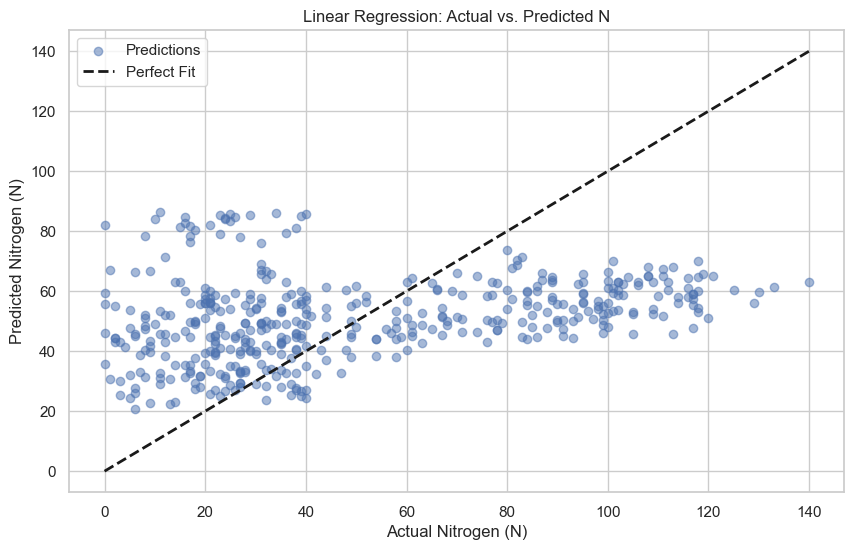

In [88]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Fit')
plt.xlabel('Actual Nitrogen (N)')
plt.ylabel('Predicted Nitrogen (N)')
plt.title('Linear Regression: Actual vs. Predicted N')
plt.legend()
plt.grid(True)
plt.show()

## Random Forest Model 2

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
# Initialize and train
rf_model = RandomForestRegressor(
    n_estimators=100,  # Number of trees
    random_state=42    # For reproducibility
)

In [91]:
# Model training
rf_model.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [92]:
# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)

In [93]:
# Evaluate
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
train_rmse = np.sqrt(mean_squared_error(y_train, rf_model.predict(X_train_scaled)))
r2_rf = r2_score(y_test, y_pred_rf)

In [94]:
print("Random Forest Results:")
print(f"- Test RMSE: {test_rmse_rf:.2f} (Lower is better)")
print(f"- Train RMSE: {train_rmse:.2f} (Lower is better)")
print(f"- R² Score: {r2_rf:.2f} (Higher is better)")

Random Forest Results:
- Test RMSE: 12.74 (Lower is better)
- Train RMSE: 4.84 (Lower is better)
- R² Score: 0.87 (Higher is better)


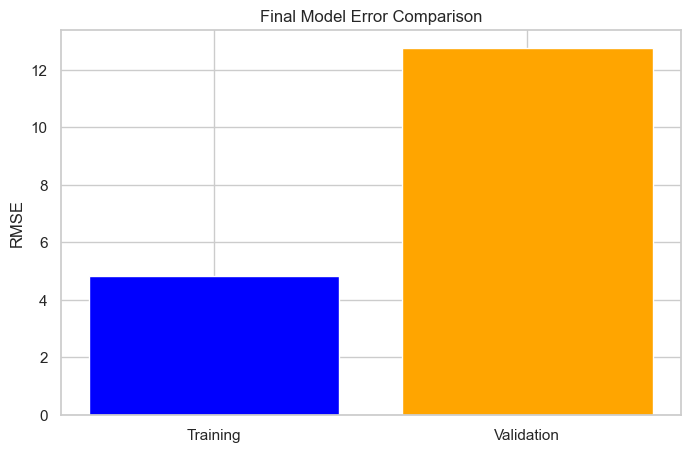

In [95]:
# Calculate final losses

plt.figure(figsize=(8, 5))
plt.bar(['Training', 'Validation'], [train_rmse, test_rmse_rf], color=['blue', 'orange'])
plt.ylabel('RMSE')
plt.title('Final Model Error Comparison')
plt.show()

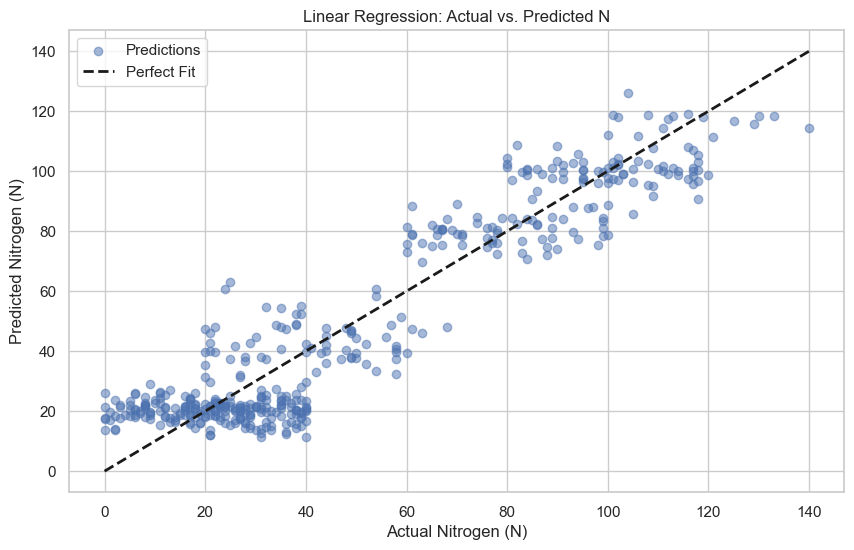

In [96]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Fit')
plt.xlabel('Actual Nitrogen (N)')
plt.ylabel('Predicted Nitrogen (N)')
plt.title('Linear Regression: Actual vs. Predicted N')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2'
)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


## Decision Tree Model 3


In [97]:
from sklearn.tree import DecisionTreeRegressor


In [98]:
# Initialize and train
dt_model = DecisionTreeRegressor(
    random_state=42,  # For reproducibility
    max_depth=5       # Prevents overfitting (adjust as needed)
)
# Model training
dt_model.fit(X_train_scaled, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [99]:
# Predictions
y_pred_dt = dt_model.predict(X_test_scaled)


In [100]:
# Evaluate
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Results:")
print(f"- RMSE: {rmse_dt:.2f} (Lower is better)")
print(f"- R² Score: {r2_dt:.2f} (Higher is better)")


Decision Tree Results:
- RMSE: 16.92 (Lower is better)
- R² Score: 0.77 (Higher is better)


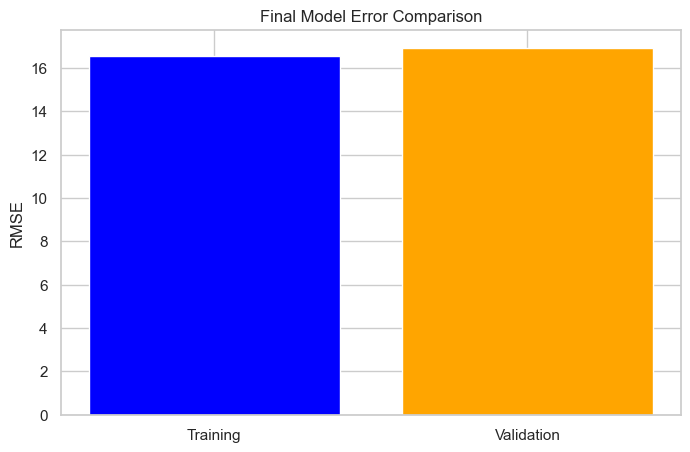

In [101]:
# Calculate final losses
train_rmse = np.sqrt(mean_squared_error(y_train, dt_model.predict(X_train_scaled)))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))

plt.figure(figsize=(8, 5))
plt.bar(['Training', 'Validation'], [train_rmse, test_rmse], color=['blue', 'orange'])
plt.ylabel('RMSE')
plt.title('Final Model Error Comparison')
plt.show()

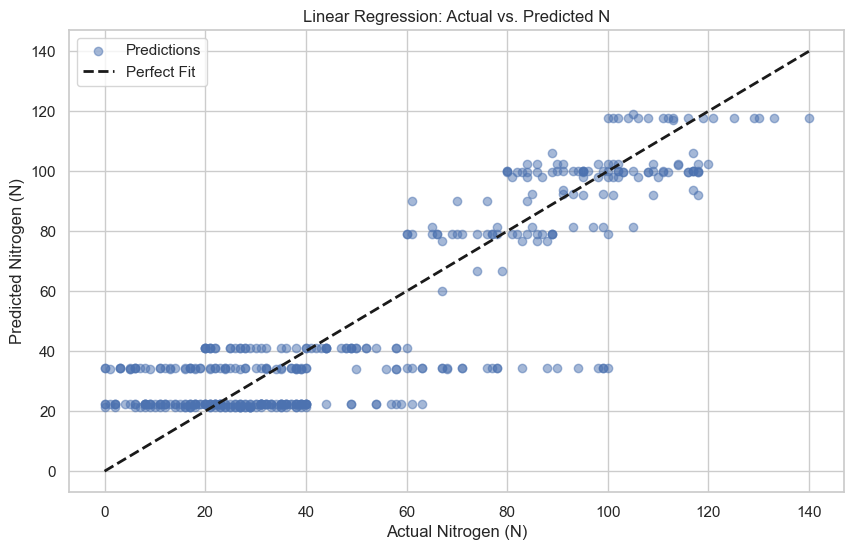

In [102]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Fit')
plt.xlabel('Actual Nitrogen (N)')
plt.ylabel('Predicted Nitrogen (N)')
plt.title('Linear Regression: Actual vs. Predicted N')
plt.legend()
plt.grid(True)
plt.show()

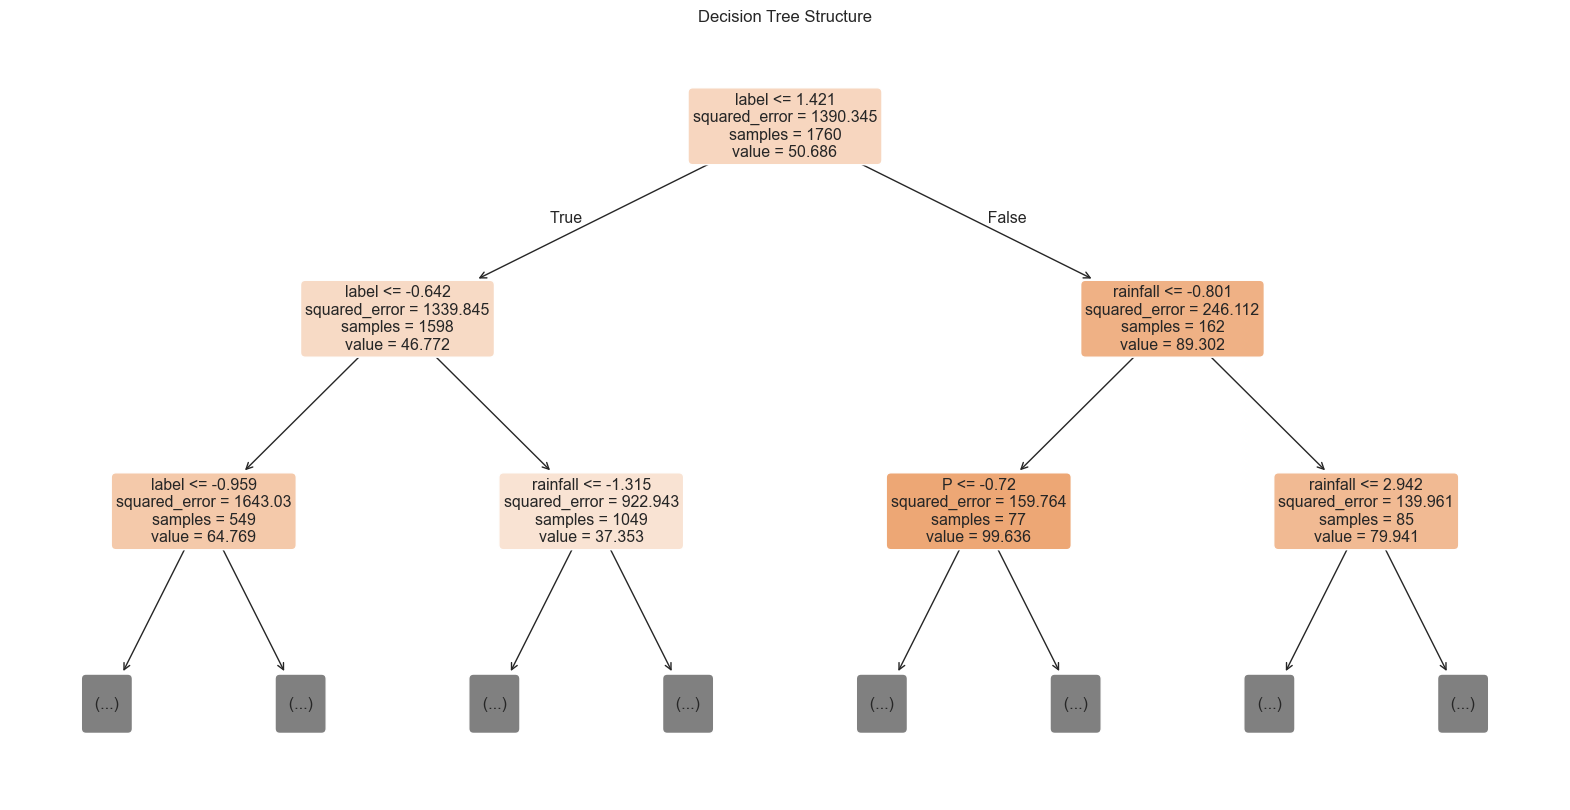

In [103]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    max_depth=2
)
plt.title("Decision Tree Structure")
plt.show()

## Comparing The Models and Using the One With the Highest RMSE and Lowest R²

In [104]:
# Compare models
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Decision Tree'],
    'RMSE': [test_rmse_lr, test_rmse_rf, rmse_dt],
    'R² Score': [r2, r2_rf, r2_dt]
}).sort_values('R² Score', ascending=False)

print(results)

               Model       RMSE  R² Score
1      Random Forest  12.743095  0.870050
2      Decision Tree  16.922399  0.770834
0  Linear Regression  33.824350  0.084444


## From the Results, I will be using The Random Forest Model since it has the lowest RMSE and Highest R²

## Save the Model using joblib library

In [105]:
import joblib

# Save the model and scaler
joblib.dump(rf_model, 'nitrogen_model.pkl')
joblib.dump(scaler, 'feature_scaler.pkl')

# Save the label encoder mapping
label_mapping = {label: i for i, label in enumerate(le.classes_)}
joblib.dump(label_mapping, 'label_mapping.pkl')

print("Label encoder classes:", le.classes_)
print("Type:", type(le.classes_[0]))

Label encoder classes: ['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']
Type: <class 'str'>
